# Breast Cancer Classification

## Goal
Try to predict if a breast tumor is bening or malignant, using its features.

### Features
* **id** ID number
* **diagnosis** The diagnosis of breast tissues (M = malignant, B = benign)
* **radius_mean** mean of distances from center to points on the perimeter
* **texture_mean** standard deviation of gray-scale values
* **perimeter_mean** mean size of the core tumor
* **area_mean**
* **smoothness_mean** mean of local variation in radius lengths
* **compactness_mean** mean of perimeter^2 / area - 1.0
* **concavity_mean** mean of severity of concave portions of the contour
* **concave points_mean** mean for number of concave portions of the contour
* **symmetry_mean**
* **fractal_dimension_mean** mean for "coastline approximation" - 1
* **radius_se** standard error for the mean of distances from center to points on the perimeter
* **texture_se** standard error for standard deviation of gray-scale values
* **perimeter_se**
* **area_se**
* **smoothness_se** standard error for local variation in radius lengths
* **compactness_se** standard error for perimeter^2 / area - 1.0
* **concavity_se** standard error for severity of concave portions of the contour
* **concave points_se** standard error for number of concave portions of the contour
* **symmetry_se**
* **fractal_dimension_se** standard error for "coastline approximation" - 1
* **radius_worst** "worst" or largest mean value for mean of distances from center to points on the perimeter
* **texture_worst** "worst" or largest mean value for standard deviation of gray-scale values
* **perimeter_worst**
* **area_worst**
* **smoothness_worst** "worst" or largest mean value for local variation in radius lengths
* **compactness_worst** "worst" or largest mean value for perimeter^2 / area - 1.0
* **concavity_worst** "worst" or largest mean value for severity of concave portions of the contour
* **concave points_worst** "worst" or largest mean value for number of concave portions of the contour
* **symmetry_worst**
* **fractal_dimension_worst** "worst" or largest mean value for "coastline approximation" - 1

## Import libraries and data

In [80]:
# Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# set seed for reproducibility
np.random.seed(0)

#Data
tumor_data = pd.read_csv('../input/data.csv')
tumor_data.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
512,915691,M,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,0.3906,0.9306,3.093,33.67,0.005414,0.022650,0.034520,0.013340,0.01705,0.004005,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,NaN
457,9112367,B,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,0.2084,1.3500,1.314,17.58,0.005768,0.008082,0.015100,0.006451,0.01347,0.001828,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788,NaN
439,909410,B,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,0.2142,0.6549,1.606,19.25,0.004837,0.009238,0.009213,0.010760,0.01171,0.002104,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,NaN
298,892214,B,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,0.2300,0.6690,1.661,20.56,0.003169,0.013770,0.010790,0.005243,0.01103,0.001957,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,NaN
37,854941,B,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,0.1839,2.3420,1.170,14.16,0.004352,0.004899,0.013430,0.011640,0.02671,0.001777,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,NaN


## Data exploration
Let's take a glance at our dataset

In [81]:
print("The dataset has %d rows and %d columns" % (tumor_data.shape[0], tumor_data.shape[1]))

The dataset has 569 rows and 33 columns


In [82]:
tumor_data.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [83]:
tumor_data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

## Data Cleaning
We're seeing that there's one column (*Unnamed: 32*) with strange stats. Let see some of their values.

In [84]:
tumor_data['Unnamed: 32'].sample(8)

440   NaN
562   NaN
427   NaN
565   NaN
495   NaN
351   NaN
14    NaN
56    NaN
Name: Unnamed: 32, dtype: float64

Apparently, this colum is completely empty. Let's make sure of it.

In [85]:
missing_values = tumor_data['Unnamed: 32'].isnull().sum()
number_of_rows = tumor_data['Unnamed: 32'].shape[0]
if missing_values == number_of_rows:
    print('The whole \'Unnamed: 32\' column has empty values.')
else:
    print('There are non-empty values in the \'Unnamed: 32\' column.')

The whole 'Unnamed: 32' column has empty values.


Now that we know that this column doesn't add any value, we can safely remove it.

In [86]:
tumor_data.drop(['Unnamed: 32'], axis= 1, inplace = True)
tumor_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Now that we removed an empty column, why don't we check this dataset doesn't have missing values?

In [87]:
tumor_data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

As promised by the dataset description, we don't have missing values in any column.

Now, there's another curious thing. The column *diagnosis* doesn't seem to have numerical values.

In [88]:
tumor_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

It's confirmed, the *diagnosis* columns has only 'B' and 'M' values. According to the dataset description, 'B' stands for 'benign' while 'M' stands for 'malignant'. Since those values are not computable for our model training, we need to convert them to numbers. We're going to create a **target** column with numerical values, where '1' will be used to indicate that the tumor is benign, and '0' if it's malignant.

In [89]:
tumor_data['target'] = tumor_data['diagnosis'].replace({'B': 1, 'M': 0})
# Let's show if the convertion was rightly done
tumor_data[['id', 'diagnosis', 'target']].sample(5)

,id,diagnosis,target
57,857793,M,0
410,905502,B,1
6,844359,M,0
175,872113,B,1
547,922840,B,1


We've succesfully converted the categorical values from *diagnosis* to number in *target*. Now we can remove *diagnosis* from the dataframe because we don't need it anymore for our classifier.

In [90]:
tumor_data.drop(['diagnosis'], axis = 1, inplace = True)
tumor_data.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'target'],
      dtype='object')

Finally, have you noticed that there is an **id** column? Should it stay or should it be removed? If we read to the dataset documentation, we'll see that this column stores the *ID number*. What does that mean?  Honestly, we don't know. It could mean the order in which the samples were taken; it could mean instead the order in which the records were added to the dataset; or it could mean anything else, even nothing! 

Since we don't know the meaning of the values in this column, we can't understand the difference between a record with id 842517 and another with id 84348301, right? Is it bigger, is it shorter? So, in order to proceed with the data analysis and training of our classifier, we're going to proceed without this arbitrary **id** column.

In [91]:
tumor_data.drop(['id'], axis = 1, inplace=True)
tumor_data.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'target'],
      dtype='object')

## Data visualization
Let's see some graphics to give us an idea of the distributions within the dataset.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


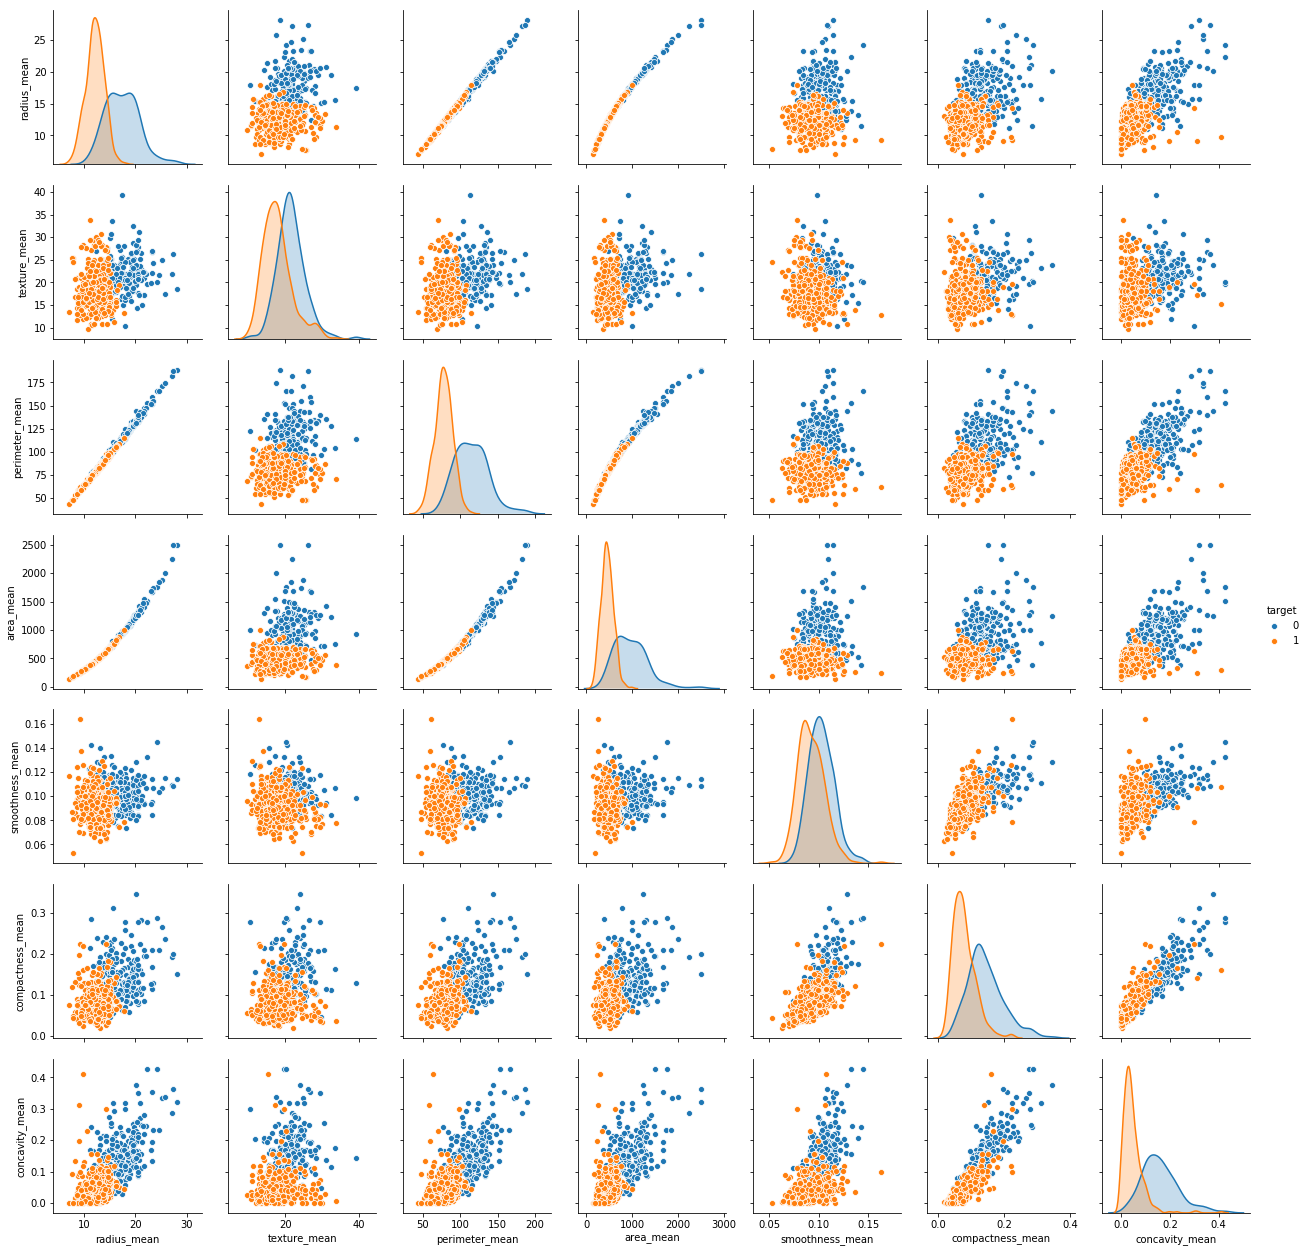

In [92]:
sns.pairplot(
    tumor_data,
    vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean'],
    hue = 'target'
)

We can see that, for each pair of parameters (at least, for the ones we chose to display using the *var* parameter), we could draw a line to separate the clases. In other words, if we pick two features, it seems to be possible separating between 'bening' and 'malignant' classes.

Now, while these graphics give us some idea about the relations between each pair of features, we could more easily (in my opinion) see the correlation between all of them in a heatmap, so let's draw one.

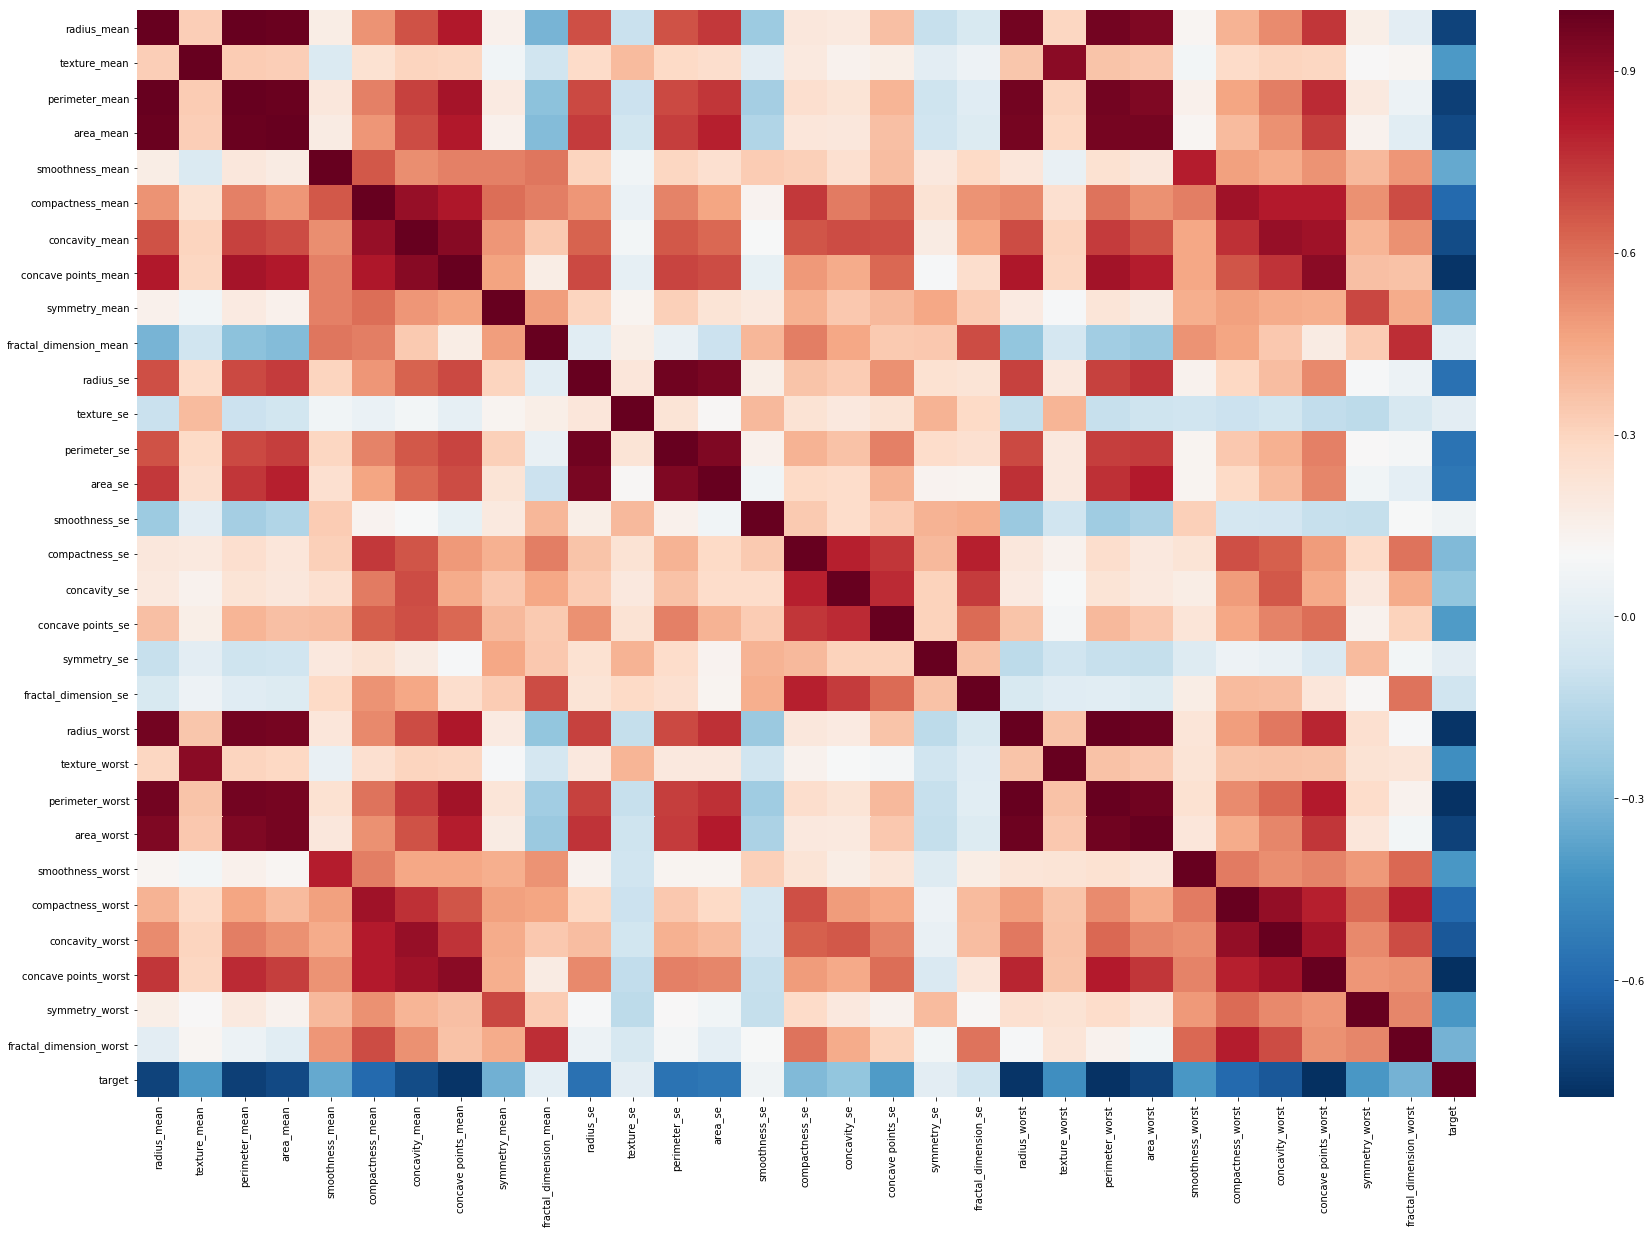

In [93]:
# First, we make sure that the graphic is crearly visible
plt.figure(figsize = (30, 20))
# And now, draw the heatmap
sns.heatmap(tumor_data.corr(), cmap = "RdBu_r")

From this heatmap we can see many things.

For example, take the *perimeter*, *radius* and *area* features and you'll see that the intersection between each combination of them has a dark red cell, meaning a strong correlation between them. This sounds kind of obvious, given that geometry states that the area is directly proportional to both perimeter and radius. Other red cells can be found in the intersection of *concavity*-*compactness*, *compactness*-*smoothness*, and even *fractal_dimension*-*smoothness*.

On the other hand, we can see that the *target* feature doesn't have red cells, which means it isn't strongly correlated to any other feature.

## Model training
Now that we've checked that our data is ready for computation, we can move on to train our model.
### Independent and dependent variables
Let's start by defining our main variables. We'll use *X* to store all features that will help us to classify a tumor, in other words, all columns from our dataframe except *target*, which is going to be the variable *Y*, our dependent variable.

In [94]:
# Independent variables
X = tumor_data.drop(['target'], axis = 1)
# Dependent variable
Y = tumor_data['target']

### Train/test data
Now we can split our data into test and train datasets.

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

### SVM training
In this case, we're going to classify tumors using SVM.

In [96]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Model evaluation
Now that we have trained our model, let's see if it's a good classifier.

In [97]:
Y_predicted = svc_model.predict(X_test)
Y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

Let's use a confusion matrix to compare the predicted values against our test dataset.

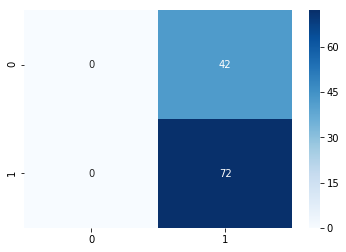

In [98]:
cm = confusion_matrix(Y_test, Y_predicted)
sns.heatmap(cm, annot = True, cmap="Blues")

Ok, so our classifier failed at classifying malignant tumors (row 0). Let's see precision, recall and f1-score for this model.

In [99]:
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.63      1.00      0.77        72

   micro avg       0.63      0.63      0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Those stats are not cool, notice that precision, recall and f1-score for malignant tumor are zero, wich means that failed completely. Actually, the trained model classified all as bening, so we need to review the training process to improve the model.

*For more information about which metrics should be considered, take a look at this great article https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c *

## Model improvement
### Normalization
First, let's review our dataset's metrics:

In [100]:
tumor_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


One of the things to notice here is that our features are not in the same scale: some ranges are in thousands, while others are between 0 and 1. In order to normalize our features, we are going to scale them using unity based normalization.

In [101]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train
X_train_scaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.342302,0.326154,0.337107,0.221032,0.394888,0.262803,0.210054,0.246471,0.379451,0.274236,0.107845,0.191073,0.101652,0.065260,0.180294,0.176891,0.080459,0.225074,0.158135,0.101094,0.301736,0.364743,0.288079,0.175725,0.402616,0.251306,0.232568,0.398008,0.313395,0.304384
std,0.171230,0.148787,0.172717,0.153808,0.124095,0.159429,0.188059,0.195884,0.137662,0.147610,0.104212,0.127062,0.098933,0.090688,0.104055,0.136083,0.073650,0.119131,0.119255,0.095671,0.178363,0.167625,0.173563,0.146279,0.146535,0.170019,0.174593,0.230344,0.139841,0.178244
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223579,0.218465,0.216260,0.118112,0.307845,0.142629,0.067619,0.101069,0.282828,0.170951,0.043025,0.103463,0.040334,0.020700,0.114611,0.084740,0.036843,0.144999,0.080045,0.047217,0.179651,0.238539,0.165696,0.080085,0.308261,0.134371,0.094786,0.223316,0.223859,0.180747
50%,0.303800,0.309773,0.297699,0.172895,0.395053,0.236887,0.149649,0.173111,0.373232,0.250934,0.076586,0.159742,0.073270,0.033597,0.156168,0.139529,0.066843,0.210267,0.132702,0.079191,0.248666,0.353145,0.235320,0.122739,0.399062,0.210090,0.198462,0.347079,0.296816,0.266410
75%,0.431114,0.409875,0.425748,0.279130,0.471879,0.340991,0.310098,0.372639,0.448990,0.346407,0.140425,0.249580,0.125100,0.076416,0.216830,0.230293,0.105909,0.281587,0.204089,0.126988,0.400391,0.476946,0.380945,0.230363,0.486231,0.345384,0.329658,0.570790,0.376901,0.393404
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After normalizing our features, we have all our values in the same scale (between zero and one). One thing to notice here is that, while the value ranges have changed, we shouldn't worry about altering our dataset because the relation between them is still the same, so the model will have the same behavior.

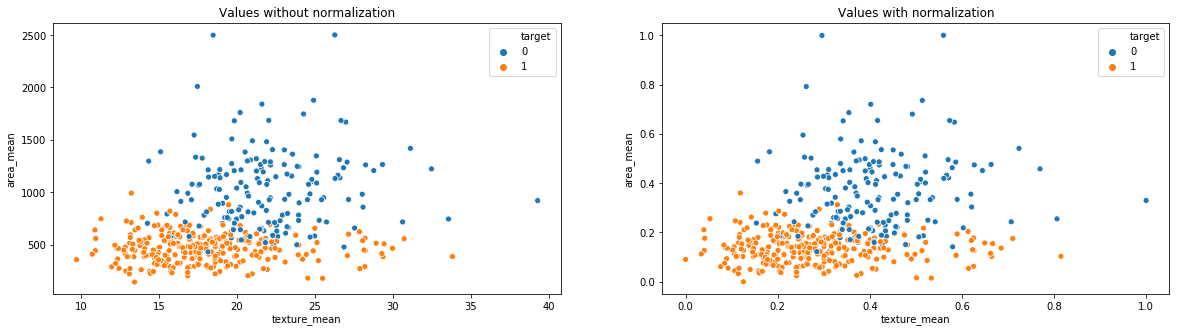

In [102]:
fig = plt.figure(figsize = (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Values without normalization')
ax2.set_title('Values with normalization')
sns.scatterplot(x = X_train['texture_mean'], y = X_train['area_mean'], hue = Y_train, ax = ax1)
sns.scatterplot(x = X_train_scaled['texture_mean'], y = X_train_scaled['area_mean'], hue = Y_train, ax = ax2)

Working with normalized features should cause an improvement in our model training. So, let's run the training again using the normalized data and test it with a normalized test dataset.

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


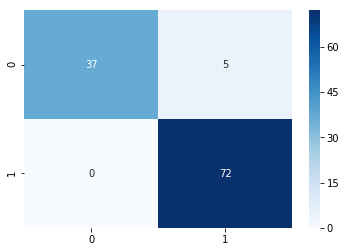

In [103]:
# Train the model again
svc_model.fit(X_train_scaled, Y_train)
# Create scaled test data
X_test_scaled = (X_test - X_test.min())/(X_test - X_test.min()).max()
# Calculate new predictions
Y_predicted = svc_model.predict(X_test_scaled)
# Draw confusion matrix
cm = confusion_matrix(Y_test, Y_predicted)
sns.heatmap(cm, annot = True, cmap='Blues')

In [104]:
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.94      1.00      0.97        72

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



This model look better than the previous one. From a f1-score of 0.5, we have now 0.95, approximately. Having said that, let's take into consideration those five cases were the target was actualy 0 but our model said they are 1. That means that those tumors were malignant but we classified them as bening. Given that we could be talking about human lives, those five people would be in serious risk and we wouldn't notice! We need to see if there's something else we can do to improve even more our model.
### SVM parameter refinement
Another improvement we can make on our model is refining the parameters of our training algorithm. In the case of SVM, we have **C** and **gamma** parameters. Both of them can help us improve our model's accuracy and generalization.

In [105]:
# We can automate the refinement of C and gamma using the GridSearchCV library
from sklearn.model_selection import GridSearchCV
C_values =  [0.1, 1, 10, 100, 1000]
gamma_values = [1, 0.1, 0.01, 0.001]
grid = GridSearchCV(SVC(), {'C': C_values, 'gamma': gamma_values, 'kernel': ['rbf']}, refit = True, verbose = 4)
# Find best pair of C and gamma values
grid.fit(X_train_scaled, Y_train)
grid.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9210526315789473, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9671052631578947, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9536423841059603, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9078947368421053, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9144736842105263, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8874172185430463, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6291390728476821, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9276315789473685, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.993421052631579, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9735099337748344, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9210526315789473, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9736842105263158, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ..............................

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.8s finished


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

Apparently, the best value for C and gamma is 1 for both of them. Let's validate it by running a new training and get a new prediction. 

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

   micro avg       0.97      0.97      0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



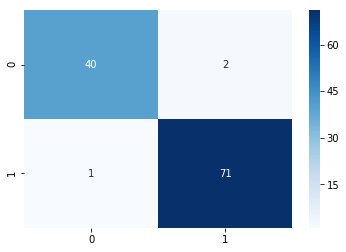

In [109]:
# We can use the optimized grid object directly to get predictions
grid_predicted = grid.predict(X_test_scaled)

cm = confusion_matrix(Y_test, grid_predicted)
sns.heatmap(cm, annot = True, cmap = 'Blues')
print(classification_report(Y_test, grid_predicted))

Good, we have slightly improve our metrics. And while the little value changes may sound insignificant, we can see that those 5 malignant tumors that we were not able to detect turned into 2, which could be very important for those people.
We can also see that now we have 1 tumor that is bening but was classified as malignant. That's not good (after all it's a wrong classification) but it's not as bad as the other classification error because in this case the person with the tumor might get more analysis and then they would realize that it's bening.

## Conclusions
After all this analysis, we can conclude that:
* SVM can run smoothly in a 569x32 dataset
* The dataset is not quite balanced. In other words, it has more bening tumor samples than malignant tumor samples.
* An SVM model can benefit from normalizing features and parameter refinement.
* Using this dataset, we can obtain a trained model able to classify benign and malignant tumors with 97% of accuracy.

## What's next?
Some ideas to implement after all this:
* Train more models using different algorithms.
* Apply k-fold cross-validation
* Create more graphs to explain better what's happening in each step